[  1.58770481   2.42836328   5.08026824   8.71004268  12.77030478
  17.61493747  23.62669817  26.1951539   33.12355084]
[  0.69514221   1.05857161   2.20497753   3.76406339   5.51871425
   7.57957722  10.12283555  12.42065144  15.34208006]
lamda= [ 1.021     1.028     1.042     1.056     1.07      1.084     1.100016
  1.112     1.126   ]
87.1302733732 1.10742157804
eta= 0.0250200064295


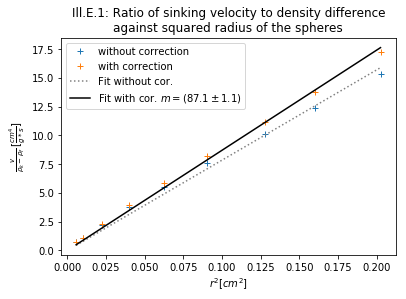

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

x = np.linspace(0,0.25,100)

t1 = np.array([32.37, 20.58, 37.01/4, 23.51/4, 24.15/6, 22.42/8, 16.78/8, 15.20/8, 12.07/8])
t2 = np.array([30.82, 21.00, 40.32/4, 23.17/4, 22.78/6, 22.56/8, 17.21/8, 15.02/8, 12.00/8])
t3 = np.array([31.92, 19.73, 39.93/4, 23.46/4, 23.54/6, 22.64/8, 16.58/8, 15.39/8, 12.17/8])
t4 = np.array([31.68, 21.87, 39.76/4, 22.70/4, 23.45/6, 22.89/8, 17.15/8, 15.61/8, 12.14/8])
t5 = np.array([30.67, 19.77, 39.82/4, 21.97/4, 23.54/6, 23.03/8, 16.93/8, 15.13/8, 12.00/8])

d = np.array([1.5,2.0,3.0,4.0,5.0,6.0,7.144,8.0,9.0])

r_sq = (d/2*0.1)**2

roh_k = np.array([1.375,1.376,1.377,1.378,1.378,1.379,1.380,1.3575,1.3625])
roh_f = np.array([1.1466,1.1466,1.1466,1.1466,1.1466,1.1466,1.1466,1.1466,1.1466])

lamba = 1 + 2.1 * ((d/2) / 75)

v = 50/((t1+t2+t3+t4+t5)/5)
y = v*0.1/(roh_k-roh_f)

print(v)
print(y)
print("lamda=",lamba)

plt.plot(r_sq,y, linestyle="None", marker="+", label="without correction")
plt.plot(r_sq,y*lamba, linestyle="None", marker="+", label="with correction")


def linear(x,m):
    return m*x

popt,pcov = curve_fit(linear,r_sq,y)
plt.plot(r_sq,linear(r_sq,*popt), label="Fit without cor.", linestyle=":", color="grey")
popt1,pcov1 = curve_fit(linear,r_sq,y*lamba)
plt.plot(r_sq,linear(r_sq,*popt1), label="Fit with cor. $m=({:.1f} \pm {:.1f})$".format(popt1[0], np.sqrt(pcov1[0][0])), color="black")

print(popt1[0], np.sqrt(pcov1[0][0]))

eta = 2/9 * (9.81/popt1[0])

print("eta=",eta)

plt.title("Ill.E.1: Ratio of sinking velocity to density difference\nagainst squared radius of the spheres")
plt.xlabel("$r^2 [cm^2]$")
plt.ylabel(r"$\frac{v}{\rho_k - \rho_f}\:[\frac{cm^4}{g*s}]$")
plt.legend()
plt.savefig("212_1.pdf", type="PDF")

[  1.19690385   2.1371453    4.82953846   8.62311111  13.47361111
  19.48584615  27.74370055  31.43671795  40.73036538]
[ 0.05834815  0.08924235  0.18669986  0.32009407  0.4693087   0.64734895
  0.86828116  0.96267191  1.21729049]


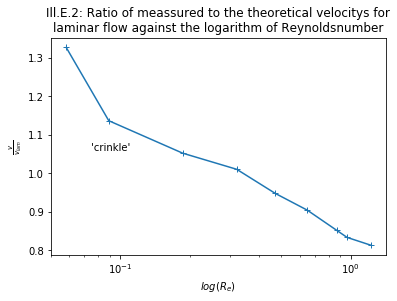

In [5]:
v_lam = 2/9 * 9.81 * 10**3 * (roh_k - roh_f)/2.34 * r_sq

print(v_lam)

R_e = roh_f * v * 75 / 2.34 *10**-3

print(R_e)

plt.errorbar((R_e),v/v_lam, fmt="+", linestyle="-")
plt.xscale("log")
plt.title("Ill.E.2: Ratio of meassured to the theoretical velocitys for\nlaminar flow against the logarithm of Reynoldsnumber")
plt.xlabel("$log(R_e)$")
plt.ylabel(r"$\frac{v}{v_{lam}}$")
plt.text(0.075,1.06,"'crinkle'")
plt.savefig("212_2.pdf", type="PDF")

0.0349614787857 0.000203575060239
0.204302180149 0.0954852656774


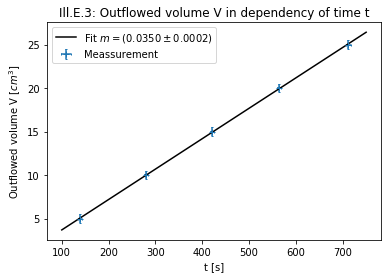

In [23]:
V = np.array([5,10,15,20,25])
t = np.array([139,60*4+40,60*7+1,60*9+24,60*11+52])
x = np.linspace(100,750,200)

plt.errorbar(t,V,xerr=5,yerr=0.5, fmt="+", capsize=1, label="Meassurement")

def linear(x,m,b):
    return m*x+b

popt,pcov = curve_fit(linear,t,V)
plt.plot(x,linear(x,*popt), label="Fit $m=({:.4f} \pm {:.4f})$".format(popt[0], np.sqrt(pcov[0][0])), linestyle="-", color="black")

print(popt[0], np.sqrt(pcov[0][0]))
print(popt[1], np.sqrt(pcov[1][1]))

plt.title("Ill.E.3: Outflowed volume V in dependency of time t")
plt.xlabel("t [s]")
plt.ylabel("Outflowed volume V [$cm^3$]")
plt.legend()
plt.savefig("212_3.pdf", type="PDF")